In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## matplotlib is used to create line plots, histograms and bar charts
## seaborn is data visualization library and used for statistical data
## seaborn is created on top of matplotlib
## pandas is used to load, filter, transform dataset for easier analysis

In [15]:
df = pd.read_csv("/kaggle/input/irisis/iris_synthetic.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.248357,3.125246,3.085502,0.968660,Iris-setosa
1,4.930868,3.173224,3.219909,1.477571,Iris-versicolor
2,5.323844,2.659988,3.873647,0.507137,Iris-virginica
3,5.761515,3.116127,3.805185,1.252023,Iris-setosa
4,4.882923,3.146536,3.489549,0.734871,Iris-versicolor


## it provides the statistical summary of the numerical columns in the dataset

In [16]:
 df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,4.958837,3.035615,3.527489,0.951021
std,0.471171,0.510857,0.474765,0.485346
min,3.690127,1.379366,2.438052,-0.235822
25%,4.665514,2.655156,3.200306,0.619234
50%,4.973041,3.071116,3.517873,0.929101
75%,5.245467,3.337615,3.842513,1.268317
max,6.231621,4.926366,4.594901,2.539440


In [17]:
 df.shape

(150, 5)

In [18]:
df["Species"].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
 df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## info provides quick summary of the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
print(df.columns)


Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


## histogram shows how often each value occurs
it tells us whether it follows normal distribution or skewed distribution and also if any outliers are present or not.

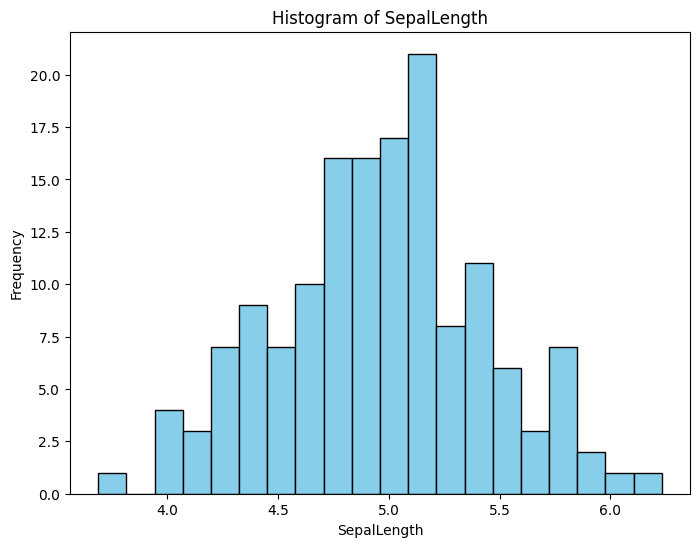

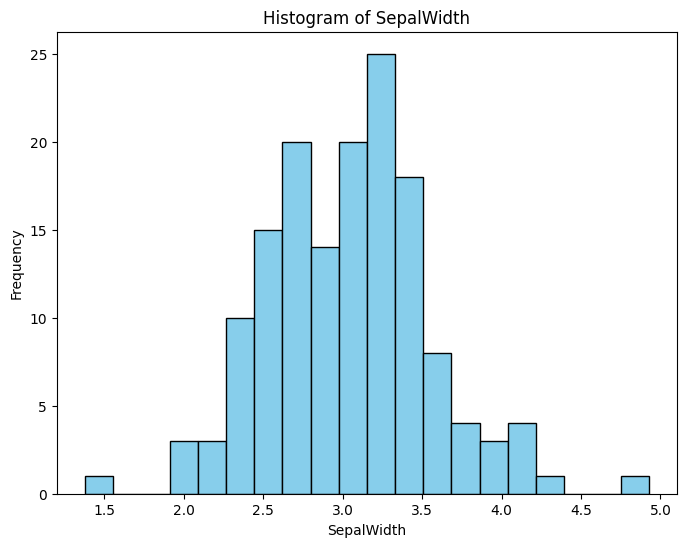

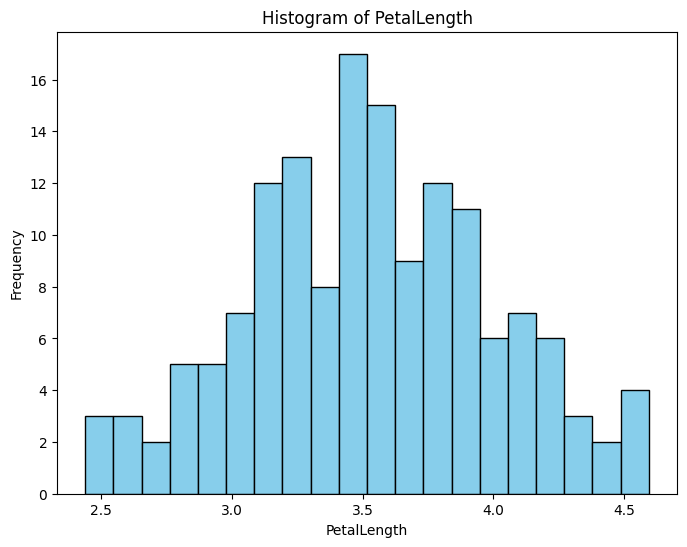

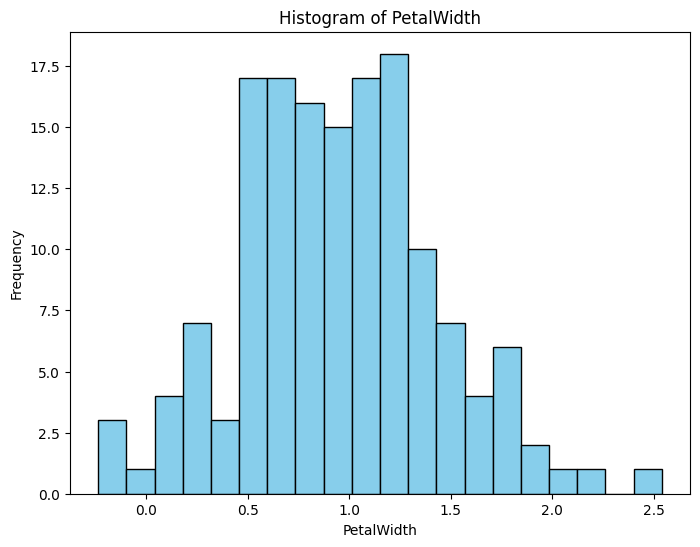

In [22]:
import matplotlib.pyplot as plt

# Define features (based on your column names in df)
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# Loop through each feature to create a histogram
for feature in features:
    plt.figure(figsize=(8, 6))  # Adjust size for each histogram
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Show each histogram separately
    plt.show()


## boxpplots tells how the data is spread
it tells you the summary of the data
it tells us the lowest,middle and highest value
outliers

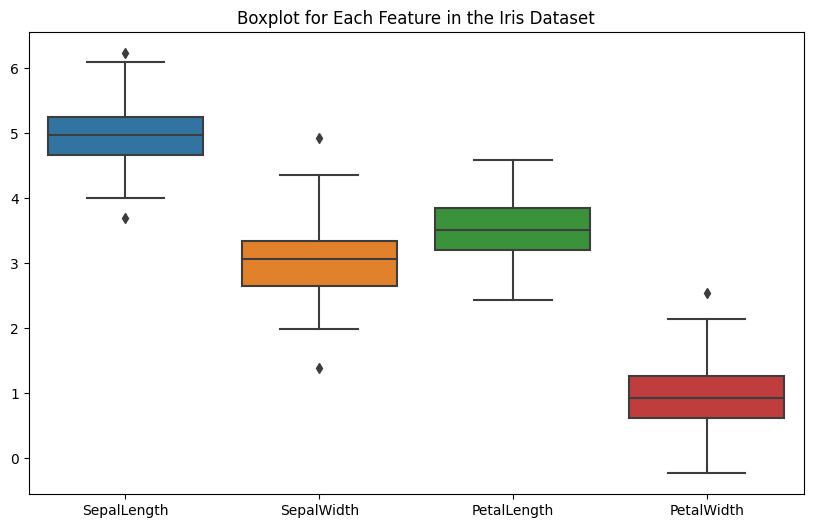

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size for all plots
plt.figure(figsize=(10, 6)) ## width 10 and height 6

# Create a boxplot for each numerical feature
sns.boxplot(data=df.select_dtypes(include=['float64'])) ## selects only numeric values
plt.title('Boxplot for Each Feature in the Iris Dataset')
plt.show()


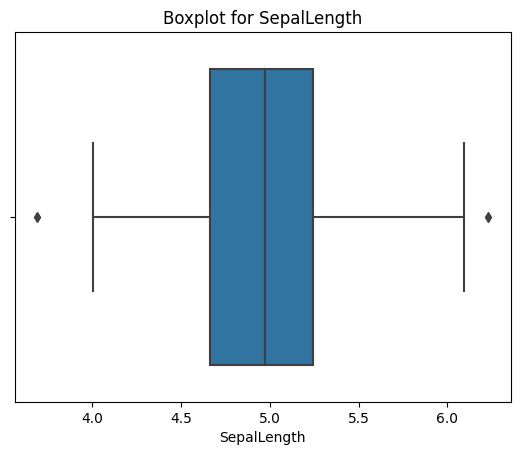

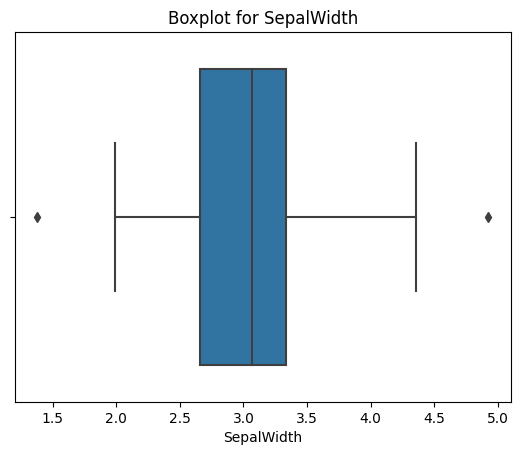

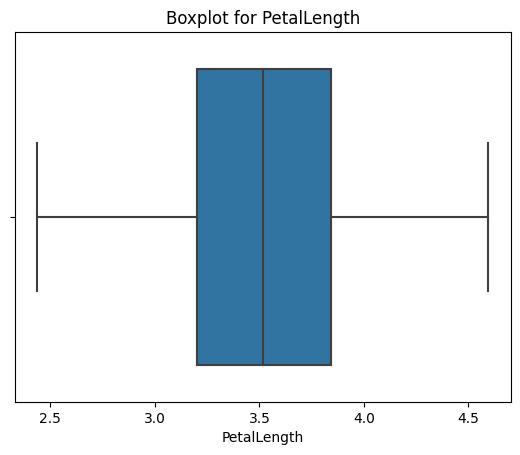

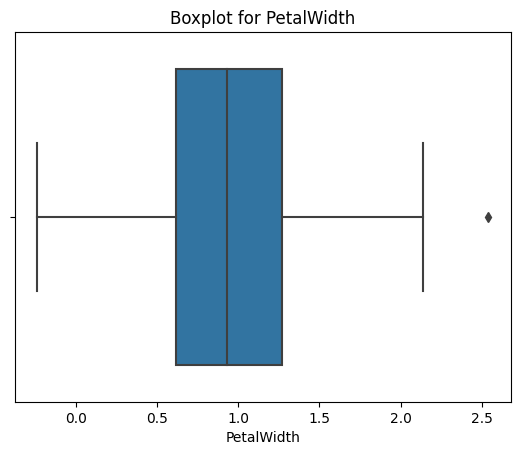

In [24]:
for column in df.select_dtypes(include=['float64']).columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


## IQR(INTER QUIARTILE RANGE) tells the spread of the middle 50% of the data
iqr=Q3-Q1
it ignores the extreme values
tells us how tightly or widely the data is spread

In [27]:
# Calculate IQR for each numeric feature
Q1 = df[numeric_features].quantile(0.25)  # 25th percentile
Q3 = df[numeric_features].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define outliers (values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR])
outliers = ((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR)))

# Display the number of outliers for each feature
print("Outliers detected in each feature:")
print(outliers.sum())  # Counts the number of outliers in each feature


Outliers detected in each feature:
SepalLength    2
SepalWidth     2
PetalLength    0
PetalWidth     1
dtype: int64


## to draw 4 histograms in one window
## subplot is small plot inside a large window

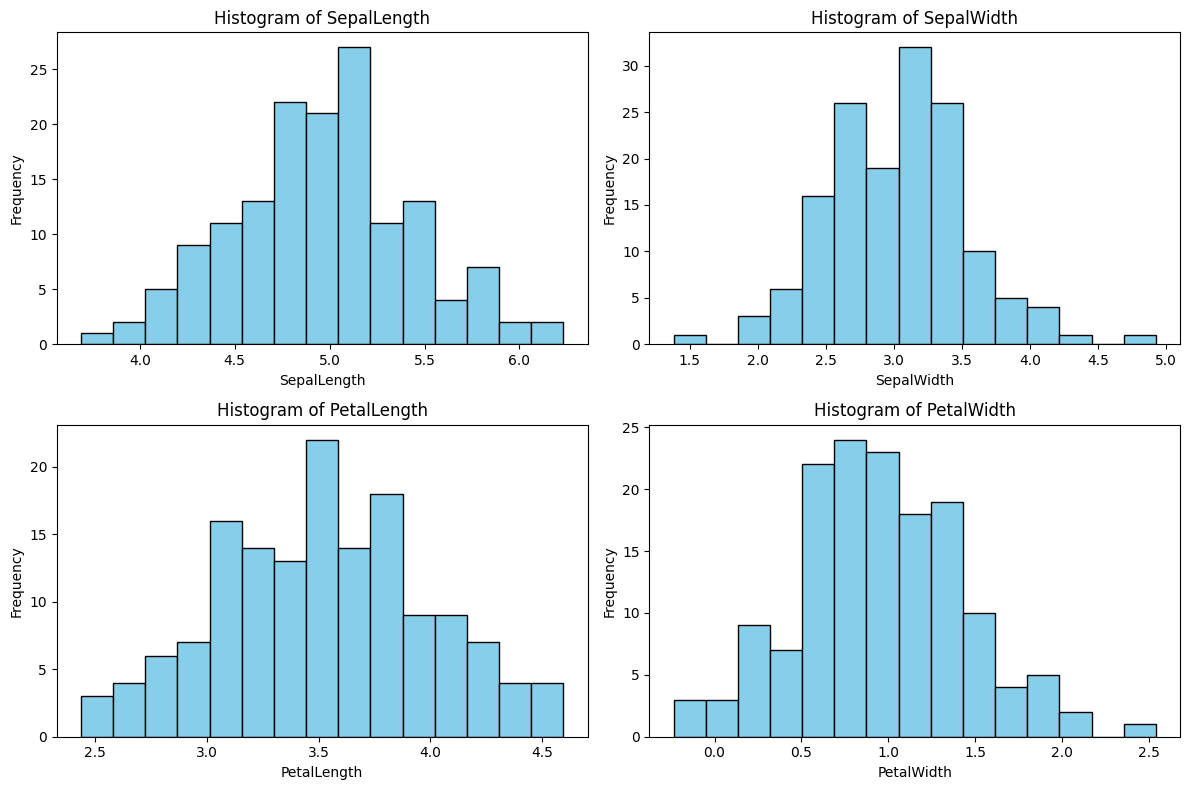

In [25]:
# Importing libraries
import matplotlib.pyplot as plt

# List of numeric columns
numeric_features = df.select_dtypes(include=['float64']).columns ## pick all the numeric values

# Create subplots
plt.figure(figsize=(12, 8)) ## width and height
for i, column in enumerate(numeric_features): ## loop for 4 features
    plt.subplot(2, 2, i + 1)  # u r making 2 columns 2 rows subplot i.e 4 subplots
    plt.hist(df[column], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


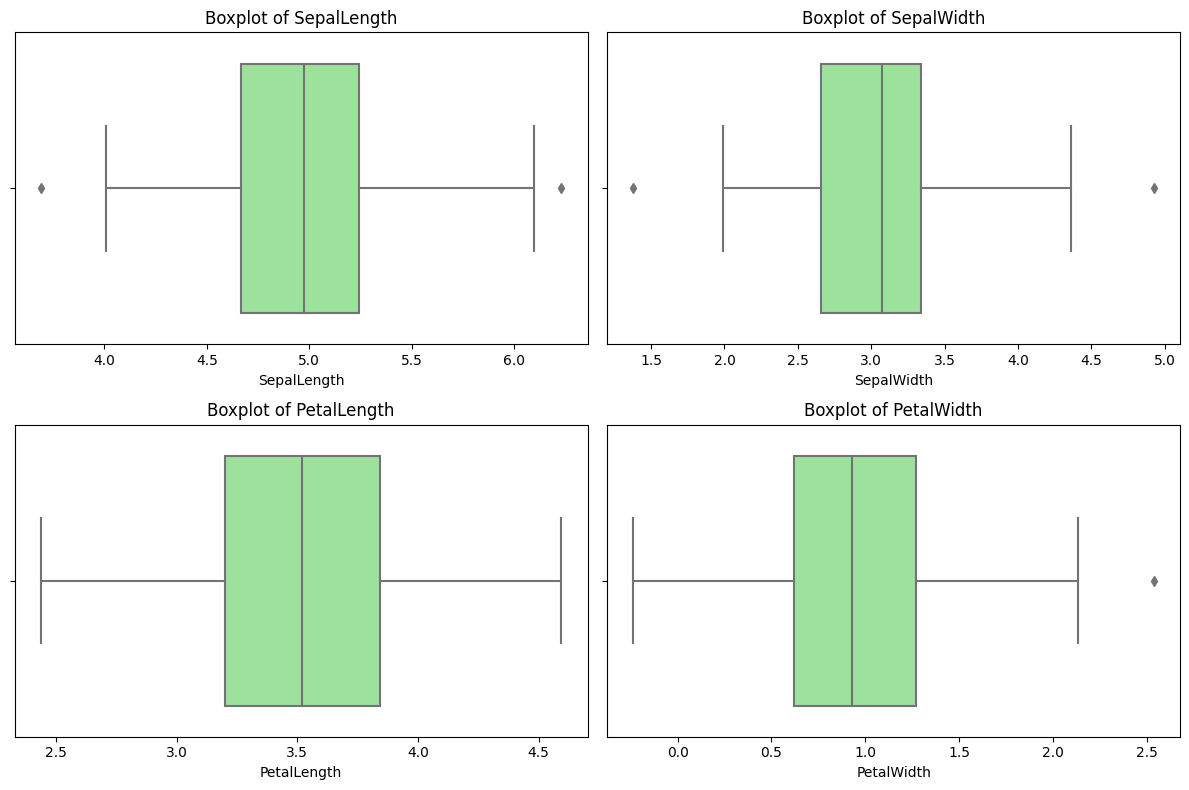

In [26]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()
